# Project Notebook 
## By : Sanchana Mohankumar
## Topic : Incident Management
### Notebook : Regression Techniques

In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from typing import Dict, Any, List, Tuple
from sklearn.base import clone


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

## Data Pre Processing 

In [142]:
data = pd.read_csv("/Users/sanchana/Downloads/incident_event_log.csv")

In [143]:
# Replacing ? with na values
data = data.replace('?', np.nan)

In [144]:
# sum of na values
data.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

### Columns to drop 
1. problem_id
2. rfc
3. vendor
4. caused_by
5. cmdb_ci
6. impact
7. urgency
8. notify
9. resolved at

In [145]:
# Droppping above column from column list 
data = data.drop(['problem_id','rfc','vendor', 'caused_by','cmdb_ci',  'resolved_at', 'impact', 'urgency', 'notify'], axis = 1)

In [146]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,Subcategory 170,Symptom 72,3 - Moderate,Group 56,NaN,True,False,code 5,Resolved by 149,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,Subcategory 215,Symptom 471,3 - Moderate,Group 70,Resolver 89,True,False,code 5,Resolved by 81,6/3/2016 10:00


In [147]:
# Drop na values 
data = data.dropna()

In [148]:
# Showing sum of na values 
data.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
closed_code                0
resolved_by                0
closed_at                  0
dtype: int64

In [149]:
data.shape

(53599, 27)

In [150]:
data.duplicated().sum()

0

In [151]:
incident = data

### Extracted numeric values from string

In [152]:
# Extracted numeric value from these columns
extract_numerics = ['caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'category', 'subcategory','u_symptom', 'priority', 'assignment_group', 'assigned_to','closed_code', 'resolved_by','number' ]
for feature in extract_numerics:
    incident[feature] = incident[feature].str.extract('(\d+)')

### Encoding 

In [153]:
#Performed Label Encoding
objList = ['incident_state', 'active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation']
for feature in objList:
    incident[feature] = le.fit_transform(incident[feature])

In [154]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,closed_at
4,0000047,6,1,0,0,0,1,2403,397,29/2/2016 04:40,...,215,471,3,70,89,1,0,5,81,6/3/2016 10:00
5,0000047,0,1,1,0,1,1,2403,397,29/2/2016 04:40,...,215,471,3,24,31,1,0,5,81,6/3/2016 10:00
6,0000047,0,1,1,0,2,1,2403,397,29/2/2016 04:40,...,215,471,3,24,31,1,0,5,81,6/3/2016 10:00
7,0000047,0,1,1,0,3,1,2403,397,29/2/2016 04:40,...,215,471,3,24,31,1,0,5,81,6/3/2016 10:00
8,0000047,0,1,1,0,4,1,2403,397,29/2/2016 04:40,...,215,471,3,24,31,1,0,5,81,6/3/2016 10:00


In [155]:
incident[['opened_at','closed_at']] = incident[['opened_at','closed_at']].apply(pd.to_datetime, format='%d/%m/%Y %H:%M')

In [156]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,closed_at
4,0000047,6,1,0,0,0,1,2403,397,2016-02-29 04:40:00,...,215,471,3,70,89,1,0,5,81,2016-03-06 10:00:00
5,0000047,0,1,1,0,1,1,2403,397,2016-02-29 04:40:00,...,215,471,3,24,31,1,0,5,81,2016-03-06 10:00:00
6,0000047,0,1,1,0,2,1,2403,397,2016-02-29 04:40:00,...,215,471,3,24,31,1,0,5,81,2016-03-06 10:00:00
7,0000047,0,1,1,0,3,1,2403,397,2016-02-29 04:40:00,...,215,471,3,24,31,1,0,5,81,2016-03-06 10:00:00
8,0000047,0,1,1,0,4,1,2403,397,2016-02-29 04:40:00,...,215,471,3,24,31,1,0,5,81,2016-03-06 10:00:00


### Computing completion time days column from opened date and closed date 

In [157]:
incident['completion_time_days'] = incident['closed_at'] - incident['opened_at']
incident['completion_time_days'] = incident['completion_time_days']/ np.timedelta64(1,'D')

In [158]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,closed_at,completion_time_days
4,0000047,6,1,0,0,0,1,2403,397,2016-02-29 04:40:00,...,471,3,70,89,1,0,5,81,2016-03-06 10:00:00,6.222222
5,0000047,0,1,1,0,1,1,2403,397,2016-02-29 04:40:00,...,471,3,24,31,1,0,5,81,2016-03-06 10:00:00,6.222222
6,0000047,0,1,1,0,2,1,2403,397,2016-02-29 04:40:00,...,471,3,24,31,1,0,5,81,2016-03-06 10:00:00,6.222222
7,0000047,0,1,1,0,3,1,2403,397,2016-02-29 04:40:00,...,471,3,24,31,1,0,5,81,2016-03-06 10:00:00,6.222222
8,0000047,0,1,1,0,4,1,2403,397,2016-02-29 04:40:00,...,471,3,24,31,1,0,5,81,2016-03-06 10:00:00,6.222222


## Incident opened at time

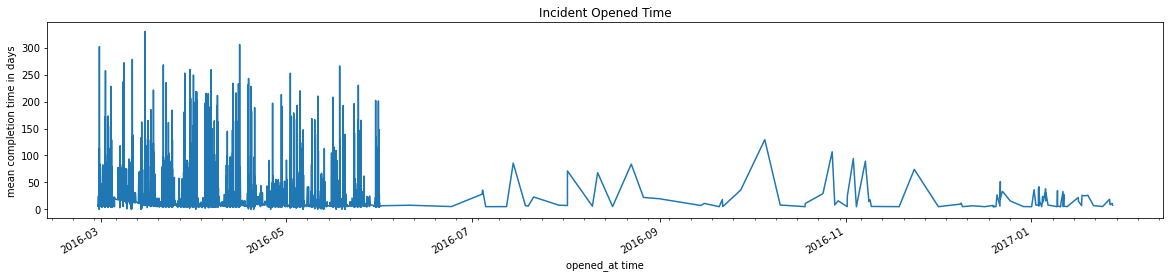

In [159]:
# tick on sundays every week
loc = mdates.WeekdayLocator(byweekday=SU)

plt.figure()
df_opened_at_time = incident.groupby('opened_at')['completion_time_days'].mean()
axt = df_opened_at_time.plot(figsize=(20, 4))
axt.xaxis.set_minor_locator(loc)
axt.set_ylabel('mean completion time in days')
axt.set_xlabel('opened_at time')
axt.set_title('Incident Opened Time')
plt.show()

## Incident closed at time

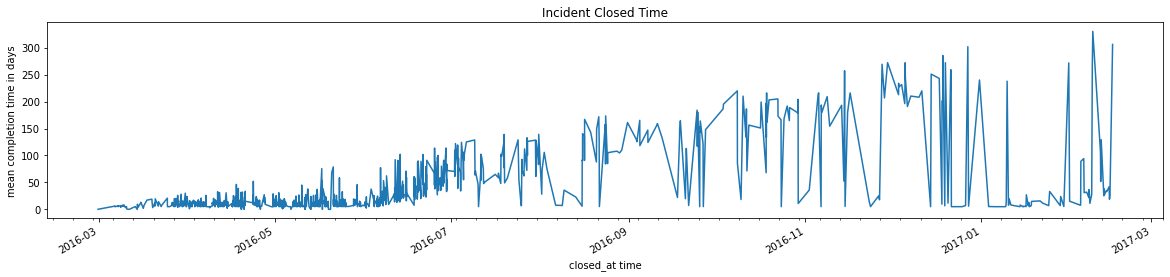

In [160]:
plt.figure()
df_opened_at_time = incident.groupby('closed_at')['completion_time_days'].mean()
axt = df_opened_at_time.plot(figsize=(20, 4))
axt.xaxis.set_minor_locator(loc)
axt.set_ylabel('mean completion time in days')
axt.set_xlabel('closed_at time')
axt.set_title('Incident Closed Time')
plt.show()

In [161]:
# Opened at 
incident['open_month'] = incident.opened_at.dt.month
incident['open_year'] = incident.opened_at.dt.year
incident['open_day'] = incident.opened_at.dt.day
incident['open_week_day'] = incident.opened_at.dt.weekday

# Closed at
incident['closed_month'] = incident.closed_at.dt.month
incident['closed_year'] = incident.closed_at.dt.year
incident['closed_day'] = incident.closed_at.dt.day
incident['closed_week_day'] = incident.closed_at.dt.weekday

## Mean completion time in Day, Month and Year  grouping by Open Year

<Figure size 432x288 with 0 Axes>

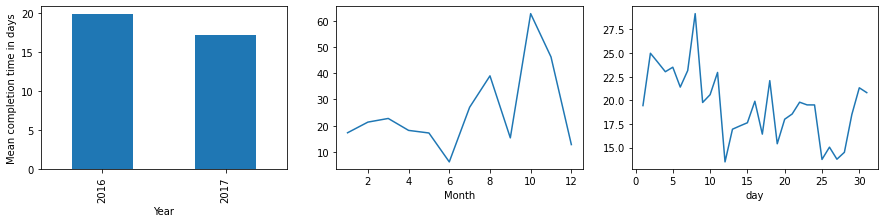

In [188]:
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
df_open_year_time = incident.groupby('open_year')['completion_time_days'].mean()
df_open_year_time.plot.bar(ax=ax1)
ax1.grid(False)
ax1.set_ylabel('Mean completion time in days')
ax1.set_xlabel('Year')

df_open_month_time = incident.groupby('open_month')['completion_time_days'].mean()
df_open_month_time.plot(ax=ax2)
ax2.grid(False)
ax2.set_xlabel('Month')

df_open_day_time = incident.groupby('open_day')['completion_time_days'].mean()
df_open_day_time.plot(ax=ax3)
ax3.grid(False)
ax3.set_xlabel('day')
plt.show()

## Mean completion time in Day, Month and Year  grouping by Close Year

<Figure size 432x288 with 0 Axes>

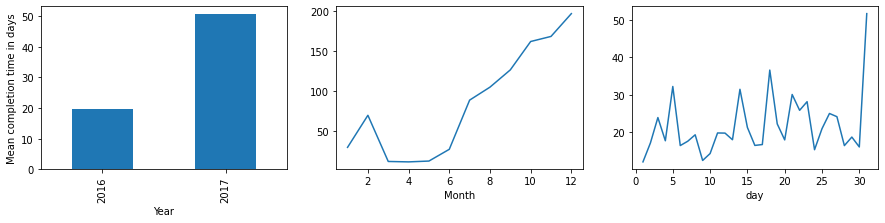

In [163]:
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
df_open_year_time = incident.groupby('closed_year')['completion_time_days'].mean()
df_open_year_time.plot.bar(ax=ax1)
ax1.grid(False)
ax1.set_ylabel('Mean completion time in days')
ax1.set_xlabel('Year')

df_open_month_time = incident.groupby('closed_month')['completion_time_days'].mean()
df_open_month_time.plot(ax=ax2)
ax2.grid(False)
ax2.set_xlabel('Month')

df_open_day_time = incident.groupby('closed_day')['completion_time_days'].mean()
df_open_day_time.plot(ax=ax3)
ax3.grid(False)
ax3.set_xlabel('day')
plt.show()

In [164]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_at,completion_time_days,open_month,open_year,open_day,open_week_day,closed_month,closed_year,closed_day,closed_week_day
4,0000047,6,1,0,0,0,1,2403,397,2016-02-29 04:40:00,...,2016-03-06 10:00:00,6.222222,2,2016,29,0,3,2016,6,6
5,0000047,0,1,1,0,1,1,2403,397,2016-02-29 04:40:00,...,2016-03-06 10:00:00,6.222222,2,2016,29,0,3,2016,6,6
6,0000047,0,1,1,0,2,1,2403,397,2016-02-29 04:40:00,...,2016-03-06 10:00:00,6.222222,2,2016,29,0,3,2016,6,6
7,0000047,0,1,1,0,3,1,2403,397,2016-02-29 04:40:00,...,2016-03-06 10:00:00,6.222222,2,2016,29,0,3,2016,6,6
8,0000047,0,1,1,0,4,1,2403,397,2016-02-29 04:40:00,...,2016-03-06 10:00:00,6.222222,2,2016,29,0,3,2016,6,6


In [165]:
incident_data = incident[['category','subcategory', 'priority','caller_id','made_sla','open_month', 'open_week_day','closed_month','closed_week_day', 'completion_time_days']]


numeric_list = [ 'category','subcategory', 'priority','caller_id','made_sla', 'completion_time_days'] 
for feature in numeric_list:
    incident_data[feature] = pd.to_numeric(incident_data[feature])

/var/folders/70/dlcm7gbd3xdgyms689ttsvjr0000gn/T/ipykernel_5461/3523212906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_data[feature] = pd.to_numeric(incident_data[feature])


In [166]:
incident_data.head()

,category,subcategory,priority,caller_id,made_sla,open_month,open_week_day,closed_month,closed_week_day,completion_time_days
4,40,215,3,2403,1,2,0,3,6,6.222222
5,40,215,3,2403,1,2,0,3,6,6.222222
6,40,215,3,2403,1,2,0,3,6,6.222222
7,40,215,3,2403,1,2,0,3,6,6.222222
8,40,215,3,2403,1,2,0,3,6,6.222222


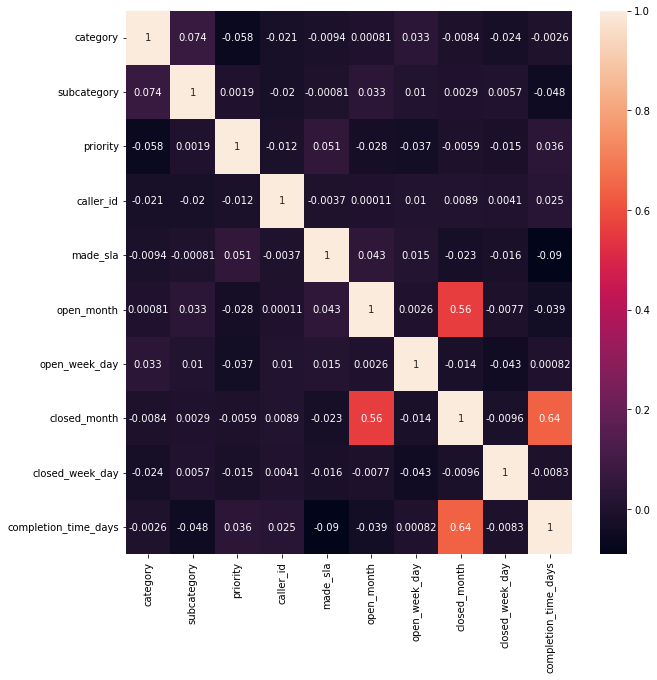

In [167]:
fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = incident_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [168]:
incident_vif = incident_data.iloc[:, 0:9]
incident_vif.head()

,category,subcategory,priority,caller_id,made_sla,open_month,open_week_day,closed_month,closed_week_day
4,40,215,3,2403,1,2,0,3,6
5,40,215,3,2403,1,2,0,3,6
6,40,215,3,2403,1,2,0,3,6
7,40,215,3,2403,1,2,0,3,6
8,40,215,3,2403,1,2,0,3,6


In [169]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = incident_vif.columns
vif["vif_Factor"] = [variance_inflation_factor(incident_vif.values, i) for i in range(incident_vif.shape[1])]
vif

,features,vif_Factor
0,category,7.322765
1,subcategory,7.678307
2,priority,29.696127
3,caller_id,3.728979
4,made_sla,13.505739
5,open_month,21.592281
6,open_week_day,2.549125
7,closed_month,15.303791
8,closed_week_day,2.657782


In [170]:
incident_data.dtypes

category                  int64
subcategory               int64
priority                  int64
caller_id                 int64
made_sla                  int64
open_month                int64
open_week_day             int64
closed_month              int64
closed_week_day           int64
completion_time_days    float64
dtype: object

In [171]:
incident_data.shape

(53599, 10)

In [172]:
incident_data = incident_data.drop_duplicates()

In [173]:
incident_data.shape

(14485, 10)

# Models

## Train Test Split

In [174]:
# Scale the dataset
y = incident_data['completion_time_days']
X = incident_data.drop(['completion_time_days'], axis = 1)

## Data Scaling

In [175]:
X_std = sc.fit_transform(X)
X_std

array([[ 0.19896414,  0.69119402,  0.11358046, ..., -1.24837254,
        -0.98590909,  1.43017192],
       [-2.11289676, -1.11132062,  0.11358046, ..., -1.24837254,
        -0.98590909, -1.33768702],
       [ 1.1684542 , -0.02675673,  0.11358046, ..., -1.24837254,
        -0.98590909, -0.8763772 ],
       ...,
       [ 0.57184494,  1.27166483,  0.11358046, ...,  1.33468242,
        -1.69453279, -0.8763772 ],
       [ 0.57184494,  1.27166483,  0.11358046, ...,  1.33468242,
        -1.69453279, -0.8763772 ],
       [-0.47222128, -0.1795122 ,  0.11358046, ...,  1.33468242,
        -1.69453279,  0.96886209]])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 64)

### Linear Regression

In [177]:
class linear_regression:
    
    def __init__(self, Xtrain, Xtest, Ytrain, Ytest, w, b, lr, epochs):
        self.Xtrain  = Xtrain
        self.Xtest   = Xtest
        self.Ytrain  = Ytrain
        self.Ytest   = Ytest
        self.w       = w
        self.b       = b
        self.lr      = lr
        self.epochs  = epochs
        
        
    def CostFunction(self):
        '''calculate cost Function'''
        cost = np.sum((((self.Xtrain.dot(self.w) + self.b) - self.Ytrain) ** 2) / (2*len(self.Ytrain)))
        return cost   
    
   
    def GradientDescent(self):
        '''Gradient Descent'''
        cost_list = [0] * self.epochs
   
        for epoch in range(self.epochs):
            z = self.Xtrain.dot(self.w) + self.b
            loss = z - self.Ytrain
        
            weight_gradient = self.Xtrain.T.dot(loss) / len(self.Ytrain)
            bias_gradient = np.sum(loss) / len(self.Ytrain)
        
            self.w = self.w - self.lr*weight_gradient
            self.b = self.b - self.lr*bias_gradient
  
            cost = self.CostFunction()
            cost_list[epoch] = cost
        
            if (epoch%(self.epochs/10)==0):
                print("Cost at epoch",epoch,"is:",cost)
        
        #return self.w, self.b, cost_list
    
    def predict(self):
        '''Predict'''
        y_pred = self.Xtest.dot(self.w) + self.b
        return y_pred
    
         
    def r2score(self):
        '''Calculating the r² accuracy of our model'''
        rss = np.sum((self.predict() - self.Ytest) ** 2)
        tss = np.sum((self.Ytest - self.Ytest.mean()) ** 2)
    
        r2 = 1 - (rss / tss)
        return r2
    
    def rmse(self):
        return np.sqrt(np.mean(np.square(self.Ytest - self.predict())))
    

In [179]:
p1 = linear_regression(Xtrain = X_train, Xtest = X_test, Ytrain = y_train,
                       Ytest = y_test, w = np.zeros(X_train.shape[1]) , b = 0, lr = 0.001 , epochs = 10000 )

In [180]:
p1.GradientDescent()

Cost at epoch 0 is: 677.4290874998205
Cost at epoch 1000 is: 313.0760028379334
Cost at epoch 2000 is: 231.96208460038815
Cost at epoch 3000 is: 205.45091287444865
Cost at epoch 4000 is: 194.98830375760943
Cost at epoch 5000 is: 190.55163804022072
Cost at epoch 6000 is: 188.6237535670463
Cost at epoch 7000 is: 187.77928648717776
Cost at epoch 8000 is: 187.40841840769397
Cost at epoch 9000 is: 187.24540265425844


In [181]:
y_pred = p1.predict()

In [182]:
print("---------------------------RMSE----------------------------")
print(p1.rmse())
print("---------------------------R2score-------------------------")
print(p1.r2score())

---------------------------RMSE----------------------------
19.337611053428123
---------------------------R2score-------------------------
0.6731056138380405


# Ridge Regression 

In [183]:
class RidgeRegression() :
      
    def __init__(self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
    
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict(self, X) :    
        return X.dot( self.W ) + self.b
    
    def r2score(self, X, Y):
        '''Calculating the r² accuracy of our model'''
        rss = np.sum((X - Y) ** 2)
        tss = np.sum((Y - Y.mean()) ** 2)
    
        r2 = 1 - (rss / tss)
        return r2
    
    def rmse(self, X, Y):
        return np.sqrt(np.mean(np.square(Y - X)))

In [187]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1)
model.fit(X_train, y_train)

# Prediction on test set
Y_pred = model.predict(X_test)    
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
print( "Real values      ", y_test[:3] )    
print( "Trained W        ", round( model.W[0], 2 ) )    
print( "Trained b        ", round( model.b, 2 ) )
      
print('--R2score--')
print(model.r2score(Y_pred , y_test))

print('--RMSE--')
print(model.rmse(Y_pred , y_test))

Predicted values  [ 36.66 120.37   5.3 ]
Real values       7921       33.011111
137589    133.974306
17514      16.740278
Name: completion_time_days, dtype: float64
Trained W         0.6
Trained b         20.17
--R2score--
0.6750331528230452
--RMSE--
19.280514464941053


## Decision Tree Regression

In [287]:
X_notstd = X.values
y_notstd = y.values.reshape(-1,1)

In [288]:
X_train_notstd, X_test_notstd, y_train_notstd, y_test_notstd = train_test_split(X_notstd, y_notstd, test_size = 0.2, random_state = 64)



In [289]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [290]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = round(np.mean(Y))
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        return self.root
    
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def r2score(self, X, Y):
        '''Calculating the r² accuracy of our model'''
        rss = np.sum((X - Y) ** 2)
        tss = np.sum((Y - Y.mean()) ** 2)
    
        r2 = 1 - (rss / tss)
        return r2
    
    def rmse(self, X, Y):
        return np.sqrt(np.mean(np.square(Y - X)))

In [291]:
regressor = DecisionTreeRegressor(min_samples_split=5, max_depth=3)
regressor.fit(X_train_notstd, y_train_notstd)

In [293]:
Y_pred = regressor.predict(X_test_notstd) 
print("---------------------------RMSE----------------------------")
print(np.sqrt(mean_squared_error(y_test_notstd, Y_pred)))
print("---------------------------R2score-------------------------")
print(r2_score(y_test_notstd, Y_pred))
print("---------------------------MSE-----------------------------")
print(mean_squared_error(y_test_notstd, Y_pred))

---------------------------RMSE----------------------------
13.981843506217915
---------------------------R2score-------------------------
0.8291044734279912
---------------------------MSE-----------------------------
195.49194783236808


## Gradient Boost Regressor

In [44]:
X_notstd = X.values
y_notstd = y.values

In [45]:
X_train_notstd, X_test_notstd, y_train_notstd, y_test_notstd = train_test_split(X_notstd, y_notstd, test_size = 0.2, random_state = 64)



In [58]:
## gradient boost tree regressor ##
class GradientBoostTreeRegressor(object):
    #initialiser
    def __init__(self, n_elements : int = 100, max_depth : int = 1) -> None:
        self.max_depth     = max_depth
        self.n_elements    = n_elements
        self.f             = []
        self.regions       = []
        self.gammas        = []
        self.mean_loss     = []
        self.e0            = 0
        
    #destructor
    def __del__(self) -> None:
        del self.max_depth
        del self.n_elements
        del self.f
        del self.regions
        del self.gammas
        del self.mean_loss
        del self.e0
        
    #private function to group data points & compute gamma parameters
    def __compute_gammas(self, yp : np.array, y_train : np.array, e : np.array) -> Tuple[np.array,Dict]:
        #initialise global gamma array
        gamma_jm = np.zeros((y_train.shape[0]))
        #iterate through each unique predicted value/region
        regions = np.unique(yp)
        gamma   = {}
        for r in regions:
            #compute index for r
            idx = yp == r
            #isolate relevant data points
            e_r = e[idx]
            y_r = y_train[idx]
            #compute the optimal gamma parameters for region r
            gamma_r = np.median(y_r - e_r)
            #populate the global gamma array
            gamma_jm[idx] = gamma_r
            #set the unique region <-> gamma pairs
            gamma[r] = gamma_r
        #append the regions to internal storage
        self.regions.append(regions)
        #return
        return((gamma_jm,gamma))
    
    #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #reset the internal class members
        self.f             = []
        self.regions       = []
        self.model_weights = []
        self.mean_loss     = []
        #initialise the ensemble & store initialisation
        e0      = np.median(y_train)
        self.e0 = np.copy(e0)
        e       = np.ones(y_train.shape[0]) * e0
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #store mae loss
            self.mean_loss.append(np.mean(np.abs(y_train - e)))
            #compute the gradients of our loss function
            g = np.sign(y_train - e)
            #initialise a weak learner & train
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X_train,g)
            #compute optimal gamma coefficients
            yp             = model.predict(X_train)
            gamma_jm,gamma = self.__compute_gammas(yp,y_train,e)
            #update the ensemble
            e += gamma_jm
            #store trained ensemble elements
            self.f.append(model)
            self.gammas.append(gamma)
            
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialise predictions
        y_pred = np.ones(X_test.shape[0]) * np.copy(self.e0)
        #cycle through each element in the ensemble
        for model,gamma,regions in zip(self.f,self.gammas,self.regions):
            #produce predictions using model
            y = model.predict(X_test)
            #cycle through each unique leaf node for model m
            for r in regions:
                #updates for region r
                idx = y == r
                y_pred[idx] += gamma[r] 
        #return predictions
        return(y_pred)
           
    #public function to return mean training loss
    def get_loss(self) -> List:
        return(self.mean_loss)
 
    #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'n_elements':self.n_elements,
                'max_depth':self.max_depth}

In [129]:
## train the gradient boost regressor with default max_depth ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=1)
rgr.fit(X_train_notstd, y_train_notstd)

In [130]:
## collect loss ##
loss1 = rgr.get_loss()

In [131]:
## train the gradient boost regressor with max_depth = 2 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=2)
rgr.fit(X_train_notstd, y_train_notstd)

In [132]:
## collect loss ##
loss2 = rgr.get_loss()

In [133]:
## train the gradient boost regressor with max_depth = 3 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=3)
rgr.fit(X_train_notstd, y_train_notstd)

In [134]:
## collect loss ##
loss3 = rgr.get_loss()

In [135]:
## train the gradient boost regressor with max_depth = 4 ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth=5)
rgr.fit(X_train_notstd, y_train_notstd)

In [136]:
## collect loss ##
loss4 = rgr.get_loss()

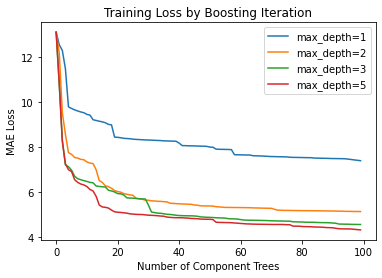

In [137]:
## plot different training losses ##
plt.plot(loss1,label='max_depth=1')
plt.plot(loss2,label='max_depth=2')
plt.plot(loss3,label='max_depth=3')
plt.plot(loss4,label='max_depth=5')
plt.title('Training Loss by Boosting Iteration')
plt.xlabel('Number of Component Trees')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

In [138]:
## train the gradient boost regressor with default max_depth ##
rgr = GradientBoostTreeRegressor(n_elements=100, max_depth = 5 )
rgr.fit(X_train_notstd, y_train_notstd)
y_pred = rgr.predict(X_test_notstd)

In [139]:
print("---------------------------RMSE----------------------------")
print(np.sqrt(mean_squared_error(y_test_notstd, y_pred)))
print("---------------------------R2score-------------------------")
print(r2_score(y_test_notstd, y_pred))
print("---------------------------MSE-----------------------------")
print(mean_squared_error(y_test_notstd, y_pred))

---------------------------RMSE----------------------------
11.200730832344899
---------------------------R2score-------------------------
0.8903283083926719
---------------------------MSE-----------------------------
125.45637117864165
